In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LSTM, Flatten, InputLayer, Conv1D, MaxPooling1D, GRU, Convolution2D
from keras.layers import Dropout, BatchNormalization, Bidirectional
from sklearn.model_selection import train_test_split  
from tensorflow.keras.utils import plot_model,to_categorical
import time

import pandas as pd  
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

import random as rn
import tensorflow as tf

In [17]:
X = np.load("X_mfcc_compare1.npy")
X = X.reshape((X.shape[0], 1, X.shape[1]))
y = np.load("y_mfcc_compare1.npy")
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [18]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(580, 1, 480) (145, 1, 480)
(580,) (145,)


In [19]:
def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(train_x.shape[1],train_x.shape[2]))) 
    model.add(LSTM(256, return_sequences=True))  
    model.add(GRU(256, return_sequences=True))
    model.add(Dense(256, activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
              
    # model compilation
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])  
    return model

In [20]:
checkpoint = ModelCheckpoint("model_compare1_lstm_gru_mfcc.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [22]:
start_time = time.time()
model = create_model()
hist = model.fit(train_x, train_y, epochs=100,callbacks=[checkpoint],steps_per_epoch =5, validation_split=0.2)  

time_total = time.time() - start_time

Epoch 1/100
5/5 [==============================] - 2s 109ms/step - loss: 0.5577 - accuracy: 0.7845 - val_loss: 0.7733 - val_accuracy: 0.7241

Epoch 00001: val_accuracy did not improve from 0.81034
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.4085 - accuracy: 0.8362 - val_loss: 0.9636 - val_accuracy: 0.7328

Epoch 00002: val_accuracy did not improve from 0.81034
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2888 - accuracy: 0.8728 - val_loss: 0.9743 - val_accuracy: 0.7672

Epoch 00003: val_accuracy did not improve from 0.81034
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 0.2549 - accuracy: 0.9073 - val_loss: 1.2944 - val_accuracy: 0.7759

Epoch 00004: val_accuracy did not improve from 0.81034
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1548 - accuracy: 0.9461 - val_loss: 1.2022 - val_accuracy: 0.7672

Epoch 00005: val_accuracy did not improve from 0.81034
Epoch 6/100
5/5 [==


Epoch 00042: val_accuracy did not improve from 0.81034
Epoch 43/100
5/5 [==============================] - 0s 54ms/step - loss: 0.0475 - accuracy: 0.9784 - val_loss: 1.9761 - val_accuracy: 0.7069

Epoch 00043: val_accuracy did not improve from 0.81034
Epoch 44/100
5/5 [==============================] - 0s 44ms/step - loss: 0.0475 - accuracy: 0.9784 - val_loss: 1.9988 - val_accuracy: 0.6983

Epoch 00044: val_accuracy did not improve from 0.81034
Epoch 45/100
5/5 [==============================] - 0s 40ms/step - loss: 0.0924 - accuracy: 0.9483 - val_loss: 1.9386 - val_accuracy: 0.7414

Epoch 00045: val_accuracy did not improve from 0.81034
Epoch 46/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0704 - accuracy: 0.9677 - val_loss: 1.9209 - val_accuracy: 0.7328

Epoch 00046: val_accuracy did not improve from 0.81034
Epoch 47/100
5/5 [==============================] - 0s 44ms/step - loss: 0.0479 - accuracy: 0.9784 - val_loss: 1.9964 - val_accuracy: 0.7328

Epoch 00047: v

5/5 [==============================] - 0s 37ms/step - loss: 0.0471 - accuracy: 0.9784 - val_loss: 2.8403 - val_accuracy: 0.7328

Epoch 00084: val_accuracy did not improve from 0.81034
Epoch 85/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0469 - accuracy: 0.9784 - val_loss: 2.7812 - val_accuracy: 0.7328

Epoch 00085: val_accuracy did not improve from 0.81034
Epoch 86/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0450 - accuracy: 0.9784 - val_loss: 2.7677 - val_accuracy: 0.7328

Epoch 00086: val_accuracy did not improve from 0.81034
Epoch 87/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0446 - accuracy: 0.9784 - val_loss: 2.7435 - val_accuracy: 0.7328

Epoch 00087: val_accuracy did not improve from 0.81034
Epoch 88/100
5/5 [==============================] - 0s 36ms/step - loss: 0.0456 - accuracy: 0.9784 - val_loss: 2.7758 - val_accuracy: 0.7328

Epoch 00088: val_accuracy did not improve from 0.81034
Epoch 89/100
5/5 [==========

Time training: 0 menit 17 detik
Accuracy: 82.76%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


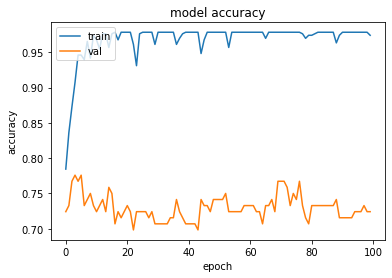

In [23]:
import math
menit = math.floor(time_total/60)
detik = math.floor(time_total - (menit*60))
print("Time training: %s menit %s detik" % (menit, detik))
# Final evaluation of the model
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

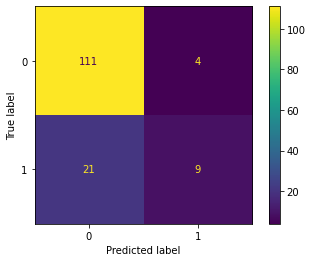

In [25]:
y_pred = model.predict(test_x)
for i in range(0,len(y_pred)) :
    selisih_to_0 = abs(0-y_pred[i][0])
    selisih_to_1 = abs(1-y_pred[i][0])
    if(min(selisih_to_0, selisih_to_1) == selisih_to_0):
        y_pred[i][0] = 0
    else:
        y_pred[i][0] = 1
cm = confusion_matrix(test_y, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [98]:
tp, tn = cm[0, 0], cm[1, 1]
fn, fp = cm[1, 0], cm[0, 1]
    
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
    
uar = (specificity + sensitivity)/2.0
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(sensitivity)
print(specificity)
print(uar)
print(accuracy)

0.8388214904679376
0.5454545454545454
0.6921380179612415
0.8
